In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

db = mysql.connector.connect(
    host = 'localhost',
    user ='root',
    password ='******',
    database = 'ecommerce')

cursor = db.cursor()

Q1. List all unique cities where customers are located.

In [2]:
query1 = """ SELECT DISTINCT customer_city FROM customers """
cursor.execute(query1)
data = cursor.fetchall()
data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

Q2. Count the number of orders placed in 2017.

In [3]:
query2 = """ SELECT COUNT(order_id) FROM orders WHERE YEAR(order_purchase_timestamp) = 2017 """
cursor.execute(query2)
data = cursor.fetchall()
print("The number of orders placed in 2017 is", data[0][0])

The number of orders placed in 2017 is 45101


Q3. Find the total sales per category.

In [4]:
query3 = """ SELECT UPPER(p.product_category) AS category, 
ROUND(SUM(pa.payment_value), 2) AS sales 
FROM products AS p JOIN order_items AS o ON p.product_id = o.product_id 
JOIN payments AS pa ON pa.order_id = o.order_id
GROUP BY p.product_category; """
cursor.execute(query3)
data = cursor.fetchall()
df = pd.DataFrame(data, columns = ["Category", "Sales"])
df

,Category,Sales
0,PERFUMERY,506738.66
1,FURNITURE DECORATION,1430176.39
2,TELEPHONY,486882.05
3,BED TABLE BATH,1712553.67
4,AUTOMOTIVE,852294.33
...,...,...
69,CDS MUSIC DVDS,1199.43
70,LA CUISINE,2913.53
71,FASHION CHILDREN'S CLOTHING,785.67
72,PC GAMER,2174.43


Q4. Calculate the percentage of orders that were paid in installments.

In [5]:
query4 = """ SELECT (SUM(CASE WHEN payment_installments >= 1 THEN 1 ELSE 0 END)) / COUNT(*) * 100 FROM payments """
cursor.execute(query4)
data = cursor.fetchall()
print("The percentage of orders that were paid in installments is", data[0][0])

The percentage of orders that were paid in installments is 99.9981


Q5. Count the number of customers from each state.

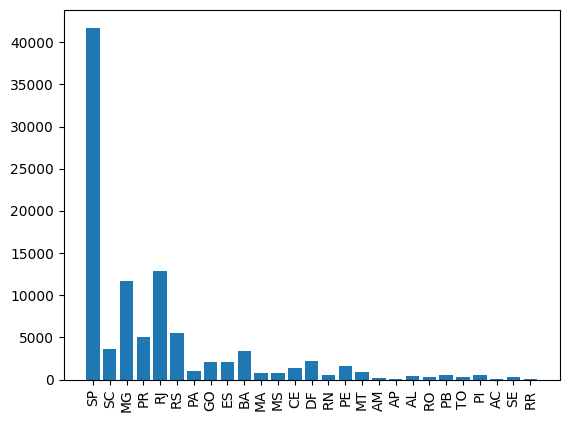

In [6]:
query5 = """ SELECT customer_state, COUNT(customer_id) AS customer_count FROM customers GROUP BY customer_state """
cursor.execute(query5)
data = cursor.fetchall()
df = pd.DataFrame(data, columns = ["State", "Customer Count"])
plt.bar(df["State"], df["Customer Count"])
plt.xticks(rotation = 90)
plt.show()

Q6. Calculate the number of orders per month in 2018.

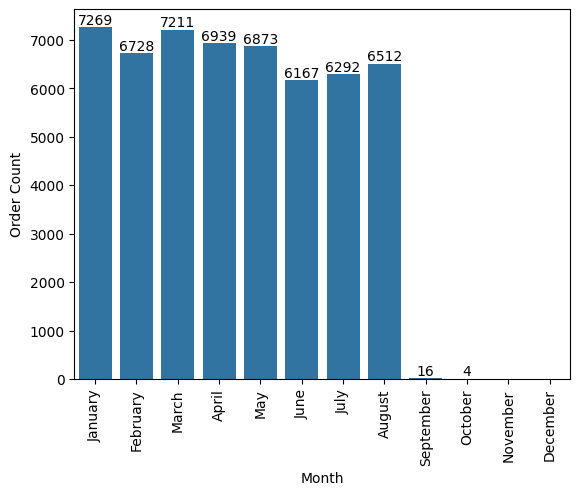

In [7]:
query6 = """ SELECT MONTHNAME(order_purchase_timestamp) AS month_name, COUNT(order_id) AS order_count
FROM orders
WHERE YEAR(order_purchase_timestamp) = 2018
GROUP BY MONTHNAME(order_purchase_timestamp)
ORDER BY MONTHNAME(order_purchase_timestamp); """
cursor.execute(query6)
data = cursor.fetchall()
df = pd.DataFrame(data, columns = ["Month", "Order Count"])
o = ["January", "February", "March", "April", "May", "June", "July", "August", "September", 
     "October", "November", "December"]
ax = sns.barplot(x = df["Month"], y = df["Order Count"], order = o)
plt.xticks(rotation = 90)
ax.bar_label(ax.containers[0])
plt.show()

Q7. Find the average number of products per order, grouped by customer city.

In [8]:
query7 = """ WITH count_per_order AS (SELECT o.order_id, o.customer_id, 
COUNT(ot.order_item_id) AS orderCount
FROM orders AS o JOIN order_items AS ot ON 
o.order_id = ot.order_id GROUP BY o.order_id, o.customer_id)
SELECT c.customer_city, ROUND(AVG(count_per_order.orderCount), 2) AS average
FROM customers AS c JOIN count_per_order ON 
c.customer_id = count_per_order.customer_id GROUP BY c.customer_city 
ORDER BY average DESC"""
cursor.execute(query7)
data = cursor.fetchall()
df = pd.DataFrame(data, columns = ["Customer City", "Average Order Count"])
df.head(10)

,Customer City,Average Order Count
0,padre carvalho,7.00
1,celso ramos,6.50
2,datas,6.00
3,candido godoi,6.00
4,matias olimpio,5.00
5,cidelandia,4.00
6,picarra,4.00
7,morro de sao paulo,4.00
8,teixeira soares,4.00
9,curralinho,4.00


Q8. Calculate the percentage of total revenue contributed by each product category.

In [9]:
query8 =  """ SELECT UPPER(p.product_category) AS category, 
ROUND(SUM(pa.payment_value)/(SELECT SUM(payment_value) FROM payments)*100, 2) AS sales 
FROM products AS p JOIN order_items AS o ON p.product_id = o.product_id 
JOIN payments AS pa ON pa.order_id = o.order_id
GROUP BY p.product_category ORDER BY sales DESC"""
cursor.execute(query8)
data = cursor.fetchall()
df = pd.DataFrame(data, columns = ["CATEGORY", "SALES PERCENTAGE"])
df

,CATEGORY,SALES PERCENTAGE
0,BED TABLE BATH,10.70
1,HEALTH BEAUTY,10.35
2,COMPUTER ACCESSORIES,9.90
3,FURNITURE DECORATION,8.93
4,WATCHES PRESENT,8.93
...,...,...
69,HOUSE COMFORT 2,0.01
70,CDS MUSIC DVDS,0.01
71,PC GAMER,0.01
72,FASHION CHILDREN'S CLOTHING,0.00


Q9. Calculate the top 3 product categories contribution in total sales.

In [10]:
query9 =  """ SELECT UPPER(p.product_category) AS category, 
ROUND(SUM(pa.payment_value)/(SELECT SUM(payment_value) FROM payments)*100, 2) AS sales 
FROM products AS p JOIN order_items AS o ON p.product_id = o.product_id 
JOIN payments AS pa ON pa.order_id = o.order_id
GROUP BY p.product_category ORDER BY sales DESC"""
cursor.execute(query9)
data = cursor.fetchall()
df = pd.DataFrame(data, columns = ["CATEGORY", "SALES PERCENTAGE"])
df
top3_percentage = round(df['SALES PERCENTAGE'].head(3).sum(), 2)
print(f"Top 3 product categories contribute: {top3_percentage}% of total sales")

Top 3 product categories contribute: 30.95% of total sales


Q10. Identify the correlation between product price and the number of times a product has been purchased.

In [11]:
import numpy as np
query10 = """ SELECT UPPER(p.product_category) AS PRODUCTS, COUNT(o.product_id) AS NO_OF_PRODUCTS_ORDERED, 
ROUND(AVG(o.price), 2) AS PRODUCT_PRICE
FROM products AS p JOIN order_items AS o ON 
o.product_id = p.product_id GROUP BY p.product_category """
cursor.execute(query10)
data = cursor.fetchall()
df = pd.DataFrame(data, columns = ["CATEGORY", "COUNT", "PRICE"])
arr1 = df["COUNT"]
arr2 = df["PRICE"]
np.corrcoef([arr1, arr2])

array([[ 1.        , -0.10631514],
       [-0.10631514,  1.        ]])

Q11. Calculate the total revenue generated by each seller, and rank them by revenue.

In [12]:
query11 = """ SELECT *, DENSE_RANK() OVER (ORDER BY revenue DESC) AS revenue_rank FROM 
(SELECT o.seller_id, ROUND(SUM(p.payment_value), 2) AS revenue FROM order_items AS o JOIN payments AS p
ON o.order_id = p.order_id GROUP BY o.seller_id) AS newTable; """
cursor.execute(query11)
data = cursor.fetchall()
df = pd.DataFrame(data, columns = ["SELLERS", "REVENUE", "RANK"])
df

,SELLERS,REVENUE,RANK
0,7c67e1448b00f6e969d365cea6b010ab,507166.91,1
1,1025f0e2d44d7041d6cf58b6550e0bfa,308222.04,2
2,4a3ca9315b744ce9f8e9374361493884,301245.27,3
3,1f50f920176fa81dab994f9023523100,290253.42,4
4,53243585a1d6dc2643021fd1853d8905,284903.08,5
...,...,...,...
3090,ad14615bdd492b01b0d97922e87cb87f,19.21,3076
3091,702835e4b785b67a084280efca355756,18.56,3077
3092,4965a7002cca77301c82d3f91b82e1a9,16.36,3078
3093,77128dec4bec4878c37ab7d6169d6f26,15.22,3079


Q12. Identify the top 3 customers who spent the most money in each year.

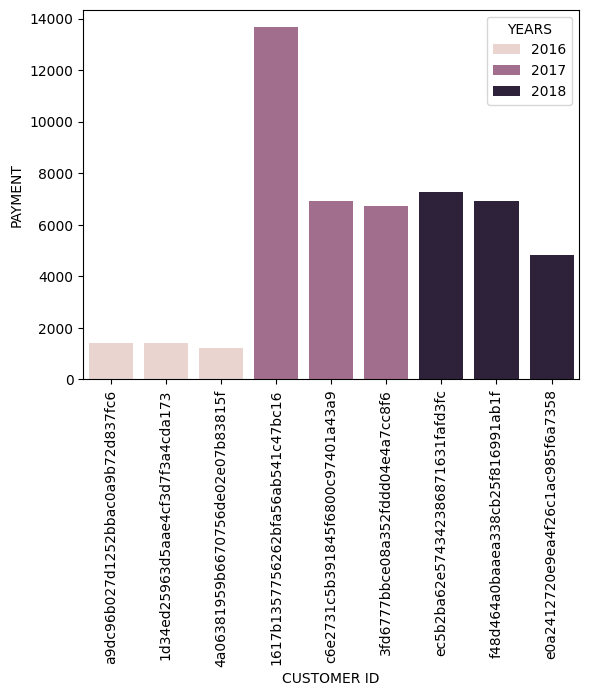

In [13]:
query12 = """ SELECT years, customer_id, payment, ranking FROM 
(SELECT YEAR(orders.order_purchase_timestamp) AS years, orders.customer_id, 
SUM(payments.payment_value) AS payment,
DENSE_RANK() OVER(PARTITION BY YEAR(orders.order_purchase_timestamp) 
ORDER BY SUM(payments.payment_value) DESC) AS ranking  FROM orders
JOIN payments ON orders.order_id = payments.order_id GROUP BY YEAR(orders.order_purchase_timestamp),
orders.customer_id) AS a WHERE ranking <= 3; """
cursor.execute(query12)
data = cursor.fetchall()
df = pd.DataFrame(data, columns = ["YEARS", "CUSTOMER ID", "PAYMENT", "RANK"])
sns.barplot(x = df["CUSTOMER ID"], y = df["PAYMENT"], hue = df["YEARS"])
plt.xticks(rotation = 90)
plt.show()

Q13. Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

In [14]:
query13 = """ WITH A AS (SELECT customers.customer_id, MIN(orders.order_purchase_timestamp) 
AS first_order FROM customers JOIN orders ON customers.customer_id = orders.customer_id
GROUP BY customers.customer_id),
B AS (SELECT A.customer_id, COUNT(DISTINCT orders.order_purchase_timestamp) AS next_order
FROM A JOIN orders ON orders.customer_id = a.customer_id AND
orders.order_purchase_timestamp > first_order AND
orders.order_purchase_timestamp < date_add(first_order, interval 6 month)
GROUP BY A.customer_id)
SELECT 100 * (COUNT(DISTINCT B.customer_id)/COUNT(DISTINCT A.customer_id))
FROM A LEFT JOIN B ON A.customer_id = B.customer_id; """
cursor.execute(query13)
data = cursor.fetchall()
data

[(Decimal('0.0000'),)]

Q14. Calculate the year-over-year growth rate of total sales.

In [15]:
query14 = """ WITH A AS (SELECT YEAR(orders.order_purchase_timestamp) AS years, 
ROUND(SUM(payments.payment_value), 2) AS sales FROM orders JOIN payments ON 
orders.order_id = payments.order_id GROUP BY years ORDER BY years)
SELECT years, ((sales - LAG(sales, 1) OVER(ORDER BY years))/
LAG(sales, 1) OVER(ORDER BY years)) * 100 FROM A; """ 
cursor.execute(query14)
data = cursor.fetchall()
df = pd.DataFrame(data, columns = ["YEARS", "yoy % growth"])
df

,YEARS,yoy % growth
0,2016,NaN
1,2017,12112.703761
2,2018,20.000924


Q15. Calculate the cumulative sales per month for each year.

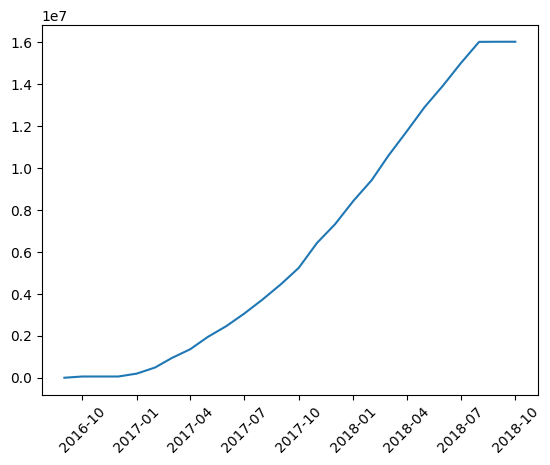

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
query15 = """ SELECT years, months, sales, SUM(sales) OVER(ORDER BY years, months) 
AS cumulative_sales FROM (SELECT YEAR(orders.order_purchase_timestamp) AS years, 
MONTH(orders.order_purchase_timestamp) AS months, ROUND(SUM(payments.payment_value), 2) AS sales 
FROM orders JOIN payments ON orders.order_id = payments.order_id 
GROUP BY years, months ORDER BY years, months) AS a; """
cursor.execute(query15)
data = cursor.fetchall()
df = pd.DataFrame(data, columns = ["YEAR", "MONTHS", "SALES", "CUMULATIVE SALES"])
df['DATE'] = pd.to_datetime(df['YEAR'].astype(str) + '-' + df['MONTHS'].astype(str).str.zfill(2))
plt.plot(df["DATE"], df["CUMULATIVE SALES"]) 
plt.xticks(rotation = 45)
plt.show()

Q16. Calculate the moving average of order values for each customer over their order history.

In [17]:
import pandas as pd
query16 = """ SELECT customer_id, order_purchase_timestamp, payment, AVG(payment) 
OVER(PARTITION BY customer_id ORDER BY order_purchase_timestamp
ROWS BETWEEN 2 PRECEDING AND CURRENT ROW) AS moving_average FROM
(SELECT orders.customer_id, orders.order_purchase_timestamp, payments.payment_value AS payment
FROM payments JOIN orders ON payments.order_id = orders.order_id) AS A; """
cursor.execute(query16)
data = cursor.fetchall()
df = pd.DataFrame(data, columns = ["Customer ID", "TimeStamp", "Price", "Average"])
df

,Customer ID,TimeStamp,Price,Average
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.350006
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.010002
...,...,...,...,...
103881,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,0.64,27.120001
103882,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,63.13,63.130001
103883,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,214.13,214.130005
103884,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.500000
